# Introduction
A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will evaluate the impact of incorrect labels on a number of different classifiers.

We have provided a number of code snippets you can use during this assignment. Feel free to modify them or replace them.


## Dataset
The dataset you will be using is the [Adult Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). This dataset was created by Ronny Kohavi and Barry Becker and was used to predict whether a person's income is more/less than 50k USD based on census data.

### Data preprocessing
Start by loading and preprocessing the data. Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14).

### Data classification
Choose at least 4 different classifiers and evaluate their performance in predicting the target variable. 

#### Preprocessing
Think about how you are going to encode the categorical variables, normalization, whether you want to use all of the features, feature dimensionality reduction, etc. Justify your choices 

A good method to apply preprocessing steps is using a Pipeline. Read more about this [here](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) and [here](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf). 

#### Data visualization
Calculate the correlation between different features, including the target variable. Visualize the correlations in a heatmap. A good example of how to do this can be found [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec). 

Select a features you think will be an important predictor of the target variable and one which is not important. Explain your answers.

#### Evaluation
Use a validation technique from the previous lecture to evaluate the performance of the model. Explain and justify which metrics you used to compare the different models. 

In [21]:
import pandas as pd
import numpy as np

In [22]:
# This can be used to load the dataset
data = pd.read_csv("adult_all.csv", header=None, na_values='?')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
#set columns
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
                   'capital-gain','capital-loss','hours-per-week','native-country','income']
display(data.info())

# encode target variables
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

# categorical variables
categorical_ix = data.select_dtypes(include=['object']).columns.tolist()
# reducing categories
data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data['education'] = data['education'].replace(['12th','11th','9th','10th','5th-6th','7th-8th','Preschool','1st-4th'],'under_HS')
data['education'] = data['education'].replace(['Assoc-acdm','Assoc-voc'],'Assoc')
data['education'] = data['education'].replace(['Some-college','Prof-school'],'College')
data['education'] = data['education'].replace(['Masters','Doctorate'],'Post-graduate')
data = data.drop(['education-num'],axis=1)
data['workclass'] = data['workclass'].replace(['State-gov','Federal-gov','Local-gov'],'Gov')
data['workclass'] = data['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self-emp')
# nan values 
for cat in categorical_ix:
    data[cat].fillna(data[cat].value_counts().index[0], inplace=True)
    print(f' {cat} have categorials :', data[cat].unique())

# numerical variables
numerical_ix = data.drop(['income'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
# nan values
for num in numerical_ix:
    data[num].fillna((data[num].mean()), inplace=True)
print('Categorical variables include: ',categorical_ix,'\n'
     'Numerical variables include:',numerical_ix )

display(data.head())
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

 workclass have categorials : ['Gov' 'Self-emp' 'Private' 'Without-pay' 'Never-worked']
 education have categorials : ['Bachelors' 'HS-grad' 'under_HS' 'Post-graduate' 'College' 'Assoc']
 marital-status have categorials : ['Never-married' 'Married' 'Divorced' 'Separated' 'Widowed']
 occupation have categorials : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
 relationship have categorials : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
 race have categorials : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
 sex have categorials : ['Male' 'Female']
 native-country have categorials : ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambo

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,under_HS,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


None

Preprocessing:

1.too many categories in marital status/education/workclass.

2.education-num and education are highly correlated, so drop education-num.

In [25]:
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
# !pip install heatmapz
from heatmap import heatmap, corrplot
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Perform feature reduction on the categorical variables

In [26]:
# categorical features reduction via chi-squre
# Null Hypothesis (H0): There is no relationship between the variables
# Alternative Hypothesis (H1): There is a relationship between variables
from scipy.stats import chi2_contingency
check = {}
related_variables = []
cc = []

for i in categorical_ix:
    dummies = pd.get_dummies(data[i])
    count = 0
    aa = 0
    n = data[i].nunique()
    bon_p_value = 0.05/n
    for series in dummies:
        chi2_check = chi2_contingency(pd.crosstab(data['income'], dummies[series]))[1]
        if  chi2_check < bon_p_value:
            check['{}_{}'.format(i, series)] = 'Reject Null Hypothesis'         # that is, there is no relationship between variables'         
        else:
            check['{}_{}'.format(i, series)] = 'Fail to Reject Null Hypothesis' # that is, there is a relationship between variables'
            related_variables.append([i, series])
            count +=1
    cc.append((i,count/n,count))
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
related_variables = np.array(related_variables)

for res in cc:
    print(f"Categorical variable '{res[0]}' is related to {res[2]} variables")
    for i in range(res[2]):
        rel_var = related_variables[related_variables[:,0]==res[0]]
        print(f"\t'{rel_var[i, 0]}' is related to '{rel_var[i, 1]}'")


Categorical variable 'workclass' is related to 2 variables
	'workclass' is related to 'Never-worked'
	'workclass' is related to 'Without-pay'
Categorical variable 'education' is related to 1 variables
	'education' is related to 'Assoc'
Categorical variable 'marital-status' is related to 0 variables
Categorical variable 'occupation' is related to 2 variables
	'occupation' is related to 'Armed-Forces'
	'occupation' is related to 'Craft-repair'
Categorical variable 'relationship' is related to 0 variables
Categorical variable 'race' is related to 0 variables
Categorical variable 'sex' is related to 0 variables
Categorical variable 'native-country' is related to 30 variables
	'native-country' is related to 'Cambodia'
	'native-country' is related to 'China'
	'native-country' is related to 'Cuba'
	'native-country' is related to 'Ecuador'
	'native-country' is related to 'France'
	'native-country' is related to 'Germany'
	'native-country' is related to 'Greece'
	'native-country' is related to 

Perform feature reduction on the numerical variables

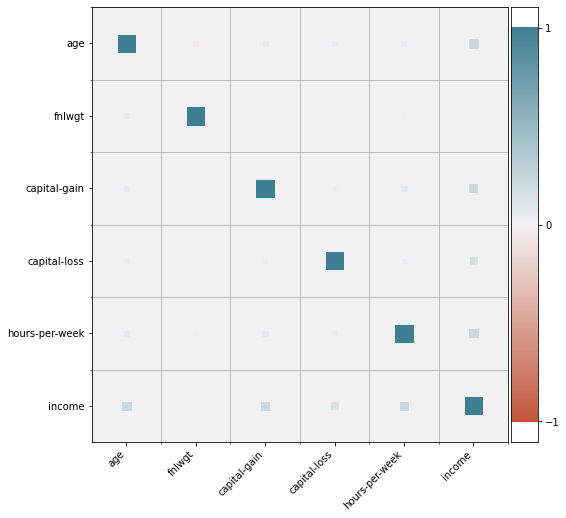

In [27]:
# visualize numerical
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300)

drop nation---high p value
drop fnlwgt--low corr

In [28]:
# drop relevant columns
data =data.drop(['fnlwgt','native-country'], axis = 1) # can we just drop native-country here, or should we just drop some of its instances? (Frans)

In [29]:
# categorical_ix = data.select_dtypes(include=['object']).columns.tolist()
# numerical_ix = data.drop(['income'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()

# full_pipeline = ColumnTransformer([
#     ('num', StandardScaler(), numerical_ix),
#     ('cat', OneHotEncoder(), categorical_ix)
#      ])
# train_data = full_pipeline.fit_transform(data)
# print(train_data.toarray()[:5],train_data.shape,train_data)

### Data classification
Choose at least 4 different classifiers and evaluate their performance in predicting the target variable. 

#### Evaluation
Use a validation technique from the previous lecture to evaluate the performance of the model. Explain and justify which metrics you used to compare the different models. 

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

numerical_ix = data.drop(['income'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_ix = data.select_dtypes(include=['object']).columns.tolist()

# Define your preprocessing steps here
steps = [('num', StandardScaler(), numerical_ix),
         ('cat', OneHotEncoder(), categorical_ix)]

# Combine steps into a ColumnTransformer
ct = ColumnTransformer(steps)

# show the correlation between different features including target variable
# def visualize(data, ct):
#     data_preprocessed = ct.fit_transform(data)
#     data_preprocessed = data_preprocessed.toarray()

#     columns = numerical_ix
#     cat_labels = ct.named_transformers_['cat'].get_feature_names()
#     cat_labels = [cat_labels[i].replace('x'+cat_labels[i][1], categorical_ix[int(cat_labels[i][1])]) for i in range(len(cat_labels))]
#     columns.extend(cat_labels)
#     data_preprocessed = pd.DataFrame(data_preprocessed, columns=columns)
    
#     # visualize numerical
#     plt.figure(figsize=(8, 8))
#     corrplot(data_preprocessed.corr())

# visualize(data, ct)



In [58]:
# Function used to plot confusion matrix
def generate_confusion_matrix(fig, ax, cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')
        

    ax.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    ax.set_title(title)
    # fig.colorbar()

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    # fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Finished with k=1/5 evaluation
Finished with k=2/5 evaluation
Finished with k=3/5 evaluation
Finished with k=4/5 evaluation
Finished with k=5/5 evaluation


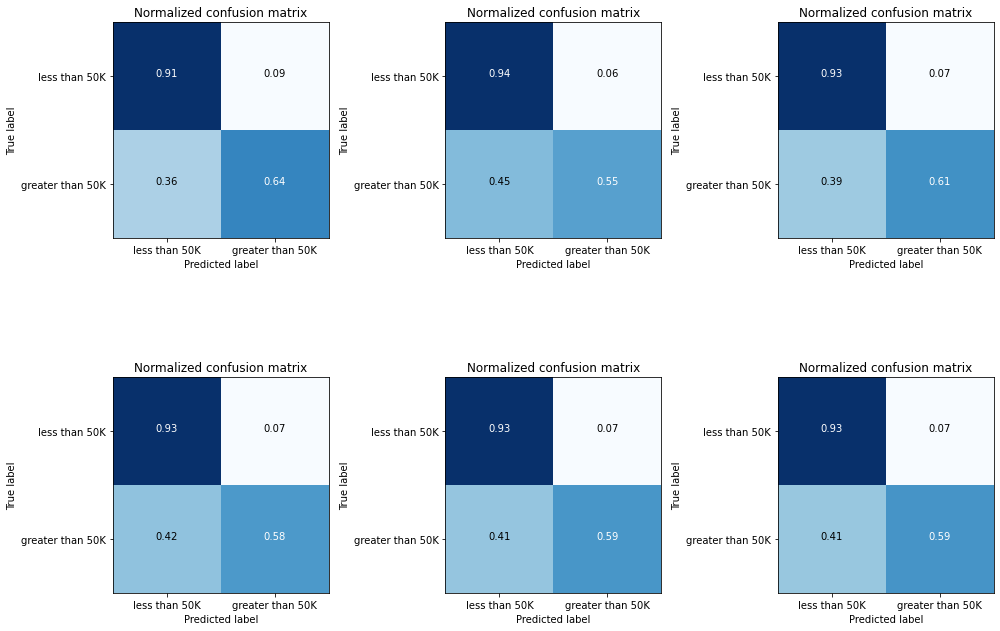

In [65]:
from sklearn.metrics import confusion_matrix
import itertools

# Apply your model to feature array X and labels y
def apply_model(model, X, y, ct):    

    # Perform k_fold cross validation on the model
    k_fold = KFold(5, shuffle=True, random_state=1)

    predicted_targets = np.array([])    # store predicted labels for the k validation runs; needed for average confusion matrix
    actual_targets = np.array([])       # store actual labels for the k validation runs; needed for average confusion matrix

    fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    i = 0
    for train_idx, test_idx in k_fold.split(X):
        train_x, test_x = X.iloc[train_idx], X.iloc[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]

        pipeline = Pipeline(steps=[('t', ct), ('m', model)])    # initiate and setup pipeline
        pipeline.fit(train_x, train_y)                          # train model in pipeline
        predicted_labels = pipeline.predict(test_x)             # test trained model

        predicted_targets = np.append(predicted_targets, predicted_labels)  # append values
        actual_targets = np.append(actual_targets, test_y)                  # append values
    
        # Evaluate model for the k^th validation run
        evaluate_model(predicted_labels, test_y, fig, axes[i%2, i//2])
        i += 1
        print(f"Finished with k={i}/5 evaluation")
    
    # Evaluate average result from the k_fold cross validation
    evaluate_model(predicted_targets, actual_targets, fig, axes[i%2, i//2])

    fig.tight_layout()
    plt.show()
    return

def evaluate_model(predicted_labels, y_test, fig, ax):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predicted_labels)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    generate_confusion_matrix(fig, ax, cnf_matrix, classes=['less than 50K', 'greater than 50K'], normalize=True, title='Normalized confusion matrix')

    return 

# Define input parameters
X = data.drop(['income'], axis=1)
y = data['income']

# Define models
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
apply_model(model, X, y, ct)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# apply_model(model, X, y, ct)

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# apply_model(model, X, y, ct)

# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier()
# apply_model(model, X, y, ct)


### Label perturbation
To evaluate the impact of faulty labels in a dataset, we will introduce some errors in the labels of our data.


#### Preparation
Start by creating a method which alters a dataset by selecting a percentage of rows randomly and swaps labels from a 0->1 and 1->0. 


In [38]:
"""Given a label vector, create a new copy where a random fraction of the labels have been flipped."""
def pertubate(y: np.ndarray, fraction: float) -> np.ndarray:
    copy = data.copy()
    # Flip fraction*len(data) of the labels in copy
    return copy

#### Analysis
Create a number of new datasets with perturbed labels, for fractions ranging from `0` to `0.5` in increments of `0.1`.

Perform the same experiment you did before, which compared the performances of different models except with the new datasets. Repeat your experiment at least 5x for each model and perturbation level and calculate the mean and variance of the scores. Visualize the change in score for different perturbation levels for all of the models in a single plot. 

State your observations. Is there a change in the performance of the models? Are there some classifiers which are impacted more/less than other classifiers and why is this the case?

In [39]:
# Code

Observations + explanations: max. 400 words

#### Discussion
Discuss how you could reduce the impact of wrongly labeled data or correct wrong labels. <br />
max. 400 words

Authors: Youri Arkesteijn, Tim van der Horst and Kevin Chong.